In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#collect most recent date
first_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(first_date)

('2017-08-23',)


In [12]:
#collect data from a years worth of precipitation
one_year= dt.date(2017, 8, 23)- dt.timedelta(days=365)
print(one_year)

2016-08-23


In [13]:
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).\
    group_by(Measurement.date).all()
print(precip)

[('2016-08-24', 1.45), ('2016-08-25', 0.11), ('2016-08-26', 0.01), ('2016-08-27', None), ('2016-08-28', 2.07), ('2016-08-29', 0.9), ('2016-08-30', 0.05), ('2016-08-31', 2.46), ('2016-09-01', 0.01), ('2016-09-02', 0.03), ('2016-09-03', 1.0), ('2016-09-04', 0.44), ('2016-09-05', 0.18), ('2016-09-06', 1.0), ('2016-09-07', 1.35), ('2016-09-08', 0.15), ('2016-09-09', 0.35), ('2016-09-10', 1.16), ('2016-09-11', 0.6), ('2016-09-12', 1.04), ('2016-09-13', 1.2), ('2016-09-14', 6.7), ('2016-09-15', 3.35), ('2016-09-16', 0.61), ('2016-09-17', 0.23), ('2016-09-18', 0.42), ('2016-09-19', 0.25), ('2016-09-20', 0.43), ('2016-09-21', 1.02), ('2016-09-22', 0.75), ('2016-09-23', 0.33), ('2016-09-24', 0.27), ('2016-09-25', 0.04), ('2016-09-26', 1.02), ('2016-09-27', 1.0), ('2016-09-28', 0.05), ('2016-09-29', 1.49), ('2016-09-30', 0.38), ('2016-10-01', 1.02), ('2016-10-02', 0.61), ('2016-10-03', 0.46), ('2016-10-04', 3.46), ('2016-10-05', 0.81), ('2016-10-06', 0.04), ('2016-10-07', 0.01), ('2016-10-08', 0

In [14]:
df = pd.DataFrame(precip, columns=['date', 'rain'])
df.set_index('date', inplace=True)
df.head()


,rain
date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN
2016-08-28,2.07


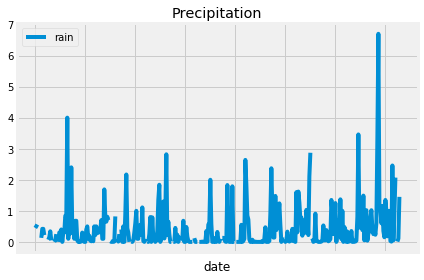

In [15]:
df.iloc[::-1].plot(title= "Precipitation")
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,rain
count,344.000000
mean,0.431308
std,0.705240
min,0.000000
25%,0.010000
50%,0.140000
75%,0.565000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Station.station).count()
print (f"The number of stations is {station_number}")

The number of stations is 9


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = active_stations[0][0]
most_active


'USC00519281'

In [20]:
min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active).all()
min

[(54.0)]

In [21]:
max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()
max

[(85.0)]

In [22]:
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()
avg

[(71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > one_year, Measurement.station==most_active).\
    group_by(Measurement.date).all()
print(station_data)


[('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10-07', 76.0), ('2016-10

In [24]:
station_df = pd.DataFrame(station_data, columns = ['Date', 'Temp'])
station_df.set_index('Date', inplace= True)
station_df.head()

,Temp
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


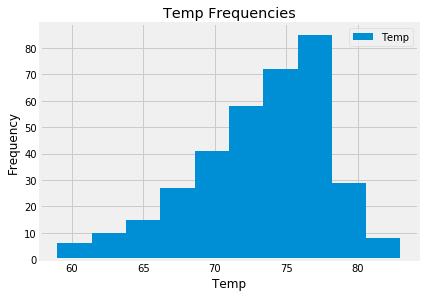

In [25]:
station_df.iloc[::-1].plot.hist(title= "Temp Frequencies")
plt.tight_layout()
plt.xlabel("Temp")
plt.show()

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [59]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2016-09-20', '2016-09-27')
trip_temps = list(np.ravel(trip_temps))
trip_temps


[70.0, 77.76923076923077, 83.0]

In [61]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin = trip_temps[0]
tavg = trip_temps[1]
tmax = trip_temps[2]

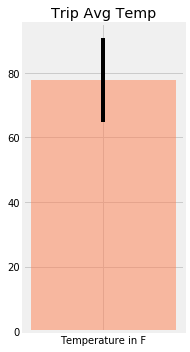

In [91]:
#bar chart
fig, ax = plt.subplots(figsize= (2.75, 5))
ax.bar("Temperature in F",tavg, yerr=(tmax-tmin),color = "coral", alpha = .5, width = .5)
ax.set_title("Trip Avg Temp")
plt.tight_layout()

In [86]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).\
filter(Measurement.date >= '2016-09-20').filter(Measurement.date <= '2016-09-27').\
order_by(func.sum(Measurement.prcp).desc()).group_by(Measurement.station).all()

total_rainfall_df = pd.DataFrame(total_rainfall, columns=["Station", "Total Precipitation for Trip Dates", "Latitude", "Longitude", "Elevation"])
total_rainfall_df


,Station,Total Precipitation for Trip Dates,Latitude,Longitude,Elevation
0,USC00516128,43.74,21.3331,-157.8025,152.4
1,USC00519281,17.55,21.3331,-157.8025,152.4
2,USC00514830,5.49,21.3331,-157.8025,152.4
3,USC00513117,5.31,21.3331,-157.8025,152.4
4,USC00519523,3.96,21.3331,-157.8025,152.4
5,USC00519397,0.90,21.3331,-157.8025,152.4
6,USC00517948,0.54,21.3331,-157.8025,152.4


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
